<a href="https://colab.research.google.com/github/sandheepgopinath/Computer-Vision/blob/master/Computer_Vision_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

<H2> Plotting the images of first 100 datapoints with Matplotlib </H2>
<body> It can also be seen that the labels of these images matches

In [0]:
import matplotlib.pyplot as plt

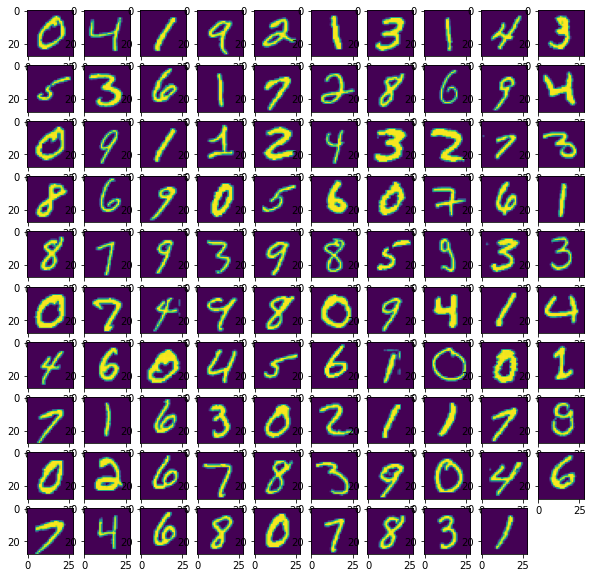

In [4]:
fig=plt.figure(figsize=(10,10))
for i in range(1,100):
  fig.add_subplot(10,10,i)
  plt.imshow(x_train[i])

In [5]:
y_train[1:100]

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
       1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3,
       9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6,
       1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0,
       4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

<H3> Testing and reshaping the datasets.

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
# Reshaping the above dataset into the required format as required by Keras

x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)


In [0]:
# The output data also needs to obe one hot encoded. 

y_test=keras.utils.to_categorical(y_test,10)
y_train=keras.utils.to_categorical(y_train,10)

<H3> Creating the Model <H3>


In [0]:
from keras import Sequential
from keras.layers import BatchNormalization,Conv2D,Flatten,Dropout,MaxPooling2D,Dense


In [0]:
model=Sequential()

# To do Batch Normalization
#model.add(BatchNormalization(input_shape=(28,28,1)))

model.add(Conv2D(32,input_shape=(28,28,1),kernel_size=(3,3),activation='relu'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [0]:
# Creating the optimizers for the model

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer=Adam(lr=0.001)

model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

<H3> Now that we have created the model, let us train it using the train dataset </H3>

In [0]:
# Initilizing the Early Stopping and Model Checkpoint functions

from keras.callbacks import ModelCheckpoint, EarlyStopping

earlyStop=EarlyStopping(monitor='val_loss',min_delta=0.001,patience=10)
Model_cp=ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True)

In [20]:
model.fit(x_train,y_train,batch_size=32,epochs=2,verbose=1,validation_data=(x_test,y_test),callbacks=[earlyStop,Model_cp])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0551 - accuracy: 0.9832 - val_loss: 0.0328 - val_accuracy: 0.9897

Epoch 00001: val_loss improved from 0.03654 to 0.03284, saving model to mnist_cnn_checkpoint_01_loss0.0328.h5
Epoch 2/2
60000/60000 [==============================] - 150s 2ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.0272 - val_accuracy: 0.9909

Epoch 00002: val_loss improved from 0.03284 to 0.02721, saving model to mnist_cnn_checkpoint_02_loss0.0272.h5


In [47]:
x_train.shape

(60000, 28, 28, 1)

In [48]:
x_test.shape

(10000, 28, 28, 1)

In [49]:
y_train.shape

(60000, 10, 10)

In [50]:
y_test.shape

(10000, 10, 10)